In [3]:
import click
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
from MCEq.core import MCEqRun
import mceq_config as config
import crflux.models as pm
from MCEq.data import InteractionCrossSections
import sys
import os
import pickle
import seaborn as sns

from cs_modifier_bsplines import ModIntCrossSections

In [4]:
interactionmodel='SIBYLL23C'

mceq_tune = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_air = MCEqRun(
    interaction_model="SIBYLL23C",
    theta_deg=0.0,
    primary_model=(pm.GlobalSplineFitBeta, None),
    density_model = ('MSIS00_IC',('South Pole','January')),
)

mceq_air.set_interaction_model("SIBYLL23C", force=True)
mceq_air.set_theta_deg(0)

cos_thetas = np.linspace(0.5, 1.0, num=6)
thetas = np.degrees(np.arccos(cos_thetas))

# modify cross section
modcs = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=-0.05, b=0., c=0.) 

mceq_tune._int_cs = modcs # add modification to cross section in mceq instance
mceq_tune.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

#test if tuning is correct:
print('ratio pion cross section tuned/untuned: ', modcs.get_cs(211, mbarn=True)/InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True))


MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('South Pole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
ratio pion cross section tuned/untuned:  [       nan        nan        nan        n

/tmp/ipykernel_1949927/4077587071.py:30: RuntimeWarning: invalid value encountered in divide
  print('ratio pion cross section tuned/untuned: ', modcs.get_cs(211, mbarn=True)/InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True))


In [5]:
modcs_all = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=00.2, b=0.2, c=0.2) 


mceq_tune = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_tune._int_cs = modcs_all # add modification to cross section in mceq instance
mceq_tune.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_a = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=00.2, b=0.0, c=0.0) 

mceq_a = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_a._int_cs = modcs_a# add modification to cross section in mceq instance
mceq_a.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_b = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=-0.0, b=0.2, c=0.0) 

mceq_b= MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_b._int_cs = modcs_b# add modification to cross section in mceq instance
mceq_b.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_c = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=-0.0, b=0., c=0.2) 
mceq_c= MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_c._int_cs = modcs_c# add modification to cross section in mceq instance
mceq_c.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change






MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_trackin

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1949927/3379453358.py:23: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$E_{\pi}$ [GeV]')
/tmp/ipykernel_1949927/3379453358.py:24: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sigma_{\pi - \mathrm{air}}$ [mb]')


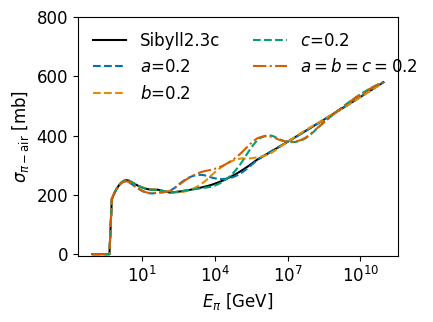

In [6]:
fig_width = 4.13  # half of 8.27 in
fig_height = 3.1  # adjust for aspect ratio

plt.rcParams.update({
    "font.size": 12,         # 12 pt font
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

colors = sns.color_palette("colorblind")

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.plot(mceq_air.e_grid,InteractionCrossSections(mceq_air._mceq_db,interaction_model=interactionmodel).get_cs(211, mbarn=True),label='Sibyll2.3c',color='black')

ax.plot(mceq_a.e_grid,modcs_a.get_cs(211, mbarn=True),label='$a$=0.2',color=colors[0],ls='--')
ax.plot(mceq_a.e_grid,modcs_b.get_cs(211, mbarn=True),label='$b$=0.2',color=colors[1],ls='--')
ax.plot(mceq_a.e_grid,modcs_c.get_cs(211, mbarn=True),label='$c$=0.2',color=colors[2],ls='--')

ax.plot(mceq_a.e_grid,modcs_all.get_cs(211, mbarn=True),label='$a=b=c=0.2$',color=colors[3],ls='-.')
ax.legend(frameon=False,ncol=2,loc='upper left')
ax.set_xlabel('$E_{\pi}$ [GeV]')
ax.set_ylabel('$\sigma_{\pi - \mathrm{air}}$ [mb]')
ax.set_ylim(-5,800)


plt.xscale('log')

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


/tmp/ipykernel_1949927/2751947804.py:44: RuntimeWarning: invalid value encountered in divide
  ax2.plot(mceq_a.e_grid, modcs_0.get_cs(211, mbarn=True) / default_cs, color=colors[0], ls='--')


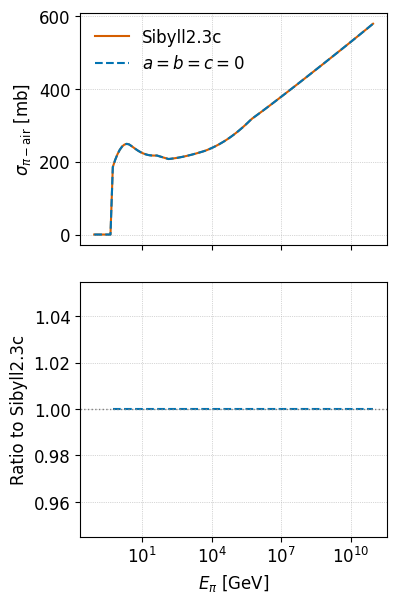

In [7]:
fig_width = 4.13  # half of A4 in inches
fig_height = 6.2  # taller for two subplots

plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

colors = sns.color_palette("colorblind")

modcs_0 = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=0, b=0., c=0.0) 


mceq_tune = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_tune._int_cs = modcs_0 # add modification to cross section in mceq instance
mceq_tune.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True, height_ratios=[1, 1.1])

# Upper plot: cross sections
ax1.plot(mceq_air.e_grid, InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True),
         label='Sibyll2.3c', color=colors[3])

ax1.plot(mceq_a.e_grid, modcs_0.get_cs(211, mbarn=True), label='$a=b=c=0$', color=colors[0], ls='--')

ax1.set_ylabel(r'$\sigma_{\pi - \mathrm{air}}$ [mb]')
ax1.legend(frameon=False)
ax1.grid(True, which='both', ls=':', lw=0.5)
ax.set_xscale('log')

# Lower plot: ratio to default
default_cs = InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True)

ax2.plot(mceq_a.e_grid, modcs_0.get_cs(211, mbarn=True) / default_cs, color=colors[0], ls='--')


ax2.axhline(1.0, color='gray', lw=1, ls=':')
ax2.set_xlabel(r'$E_{\pi}$ [GeV]')
ax2.set_ylabel('Ratio to Sibyll2.3c')
ax2.grid(True, which='both', ls=':', lw=0.5)
ax2.set_xscale('log')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
plt.savefig(plot_dir + "splinetest_nomod.pdf",dpi=500)

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1949927/1393743160.py:10: SyntaxWarning: invalid escape sequence '\D'
  ax1.plot(mceq_a.e_grid, modcs_a.get_cs(211, mbarn=True), label='$\Delta_{\pi-\mathrm{air, 1T}}=0.2$', color=colors[0], ls='--')
/tmp/ipykernel_1949927/1393743160.py:11: SyntaxWarning: invalid escape sequence '\D'
  ax1.plot(mceq_a.e_grid, modcs_b.get_cs(211, mbarn=True), label='$\Delta_{\pi-\mathrm{air, 32T}}=0.2$', color=colors[1], ls='--')
/tmp/ipykernel_1949927/1393743160.py:12: SyntaxWarning: invalid escape sequence '\D'
  ax1.plot(mceq_a.e_grid, modcs_c.get_cs(211, mbarn=True), label='$\Delta_{\pi-\mathrm{air, 1P}}=0.2$', color=colors[2], ls='--')
/tmp/ipykernel_1949927/1393743160.py:23: Runtime

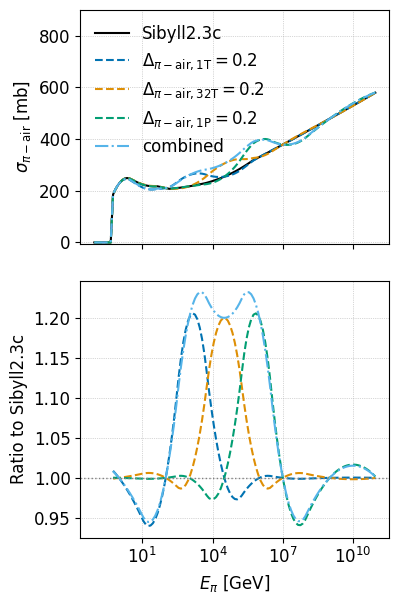

In [8]:
# check if unmodified spline = default



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True, height_ratios=[1, 1.1])

# Upper plot: cross sections
ax1.plot(mceq_air.e_grid, InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True),
         label='Sibyll2.3c', color='black')
ax1.plot(mceq_a.e_grid, modcs_a.get_cs(211, mbarn=True), label='$\Delta_{\pi-\mathrm{air, 1T}}=0.2$', color=colors[0], ls='--')
ax1.plot(mceq_a.e_grid, modcs_b.get_cs(211, mbarn=True), label='$\Delta_{\pi-\mathrm{air, 32T}}=0.2$', color=colors[1], ls='--')
ax1.plot(mceq_a.e_grid, modcs_c.get_cs(211, mbarn=True), label='$\Delta_{\pi-\mathrm{air, 1P}}=0.2$', color=colors[2], ls='--')
ax1.plot(mceq_a.e_grid, modcs_all.get_cs(211, mbarn=True), label='combined', color=colors[9], ls='-.')

ax1.set_ylabel(r'$\sigma_{\pi - \mathrm{air}}$ [mb]')
ax1.legend(frameon=False,loc='upper left')
ax1.grid(True, which='both', ls=':', lw=0.5)
ax1.set_xscale('log')
ax1.set_ylim(-5,900)
# Lower plot: ratio to default
default_cs = InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True)

ax2.plot(mceq_a.e_grid, modcs_a.get_cs(211, mbarn=True) / default_cs, label='mod $a$', color=colors[0], ls='--')
ax2.plot(mceq_a.e_grid, modcs_b.get_cs(211, mbarn=True) / default_cs, label='mod $b$', color=colors[1], ls='--')
ax2.plot(mceq_a.e_grid, modcs_c.get_cs(211, mbarn=True) / default_cs, label='mod $bc', color=colors[2], ls='--')
ax2.plot(mceq_a.e_grid, modcs_all.get_cs(211, mbarn=True) / default_cs, label='mod $a=b=c$', color=colors[9], ls='-.')

ax2.axhline(1.0, color='gray', lw=1, ls=':')
ax2.set_xlabel(r'$E_{\pi}$ [GeV]')
ax2.set_ylabel('Ratio to Sibyll2.3c')
ax2.grid(True, which='both', ls=':', lw=0.5)
ax2.set_xscale('log')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
plt.savefig(plot_dir + "spline_modificaton_cschange.pdf",dpi=500)

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1949927/1468173159.py:6: SyntaxWarning: invalid escape sequence '\D'
  ax1.plot(mceq_a.e_grid, modcs_a.get_cs(211, mbarn=True), label='$\Delta_{\pi-\mathrm{air, 1T}}=0.2$', color=colors[0], ls='--')
/tmp/ipykernel_1949927/1468173159.py:19: SyntaxWarning: invalid escape sequence '\D'
  ax2.plot(mceq_a.e_grid, modcs_a.get_cs(211, mbarn=True) / default_cs, label='$\Delta_{\pi-\mathrm{air, 1T}}=0.2$', color=colors[0], ls='--')
/tmp/ipykernel_1949927/1468173159.py:19: RuntimeWarning: invalid value encountered in divide
  ax2.plot(mceq_a.e_grid, modcs_a.get_cs(211, mbarn=True) / default_cs, label='$\Delta_{\pi-\mathrm{air, 1T}}=0.2$', color=colors[0], ls='--')


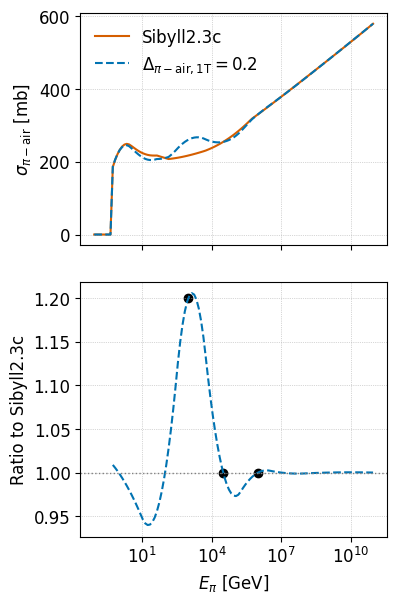

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True, height_ratios=[1, 1.1])

# Upper plot: cross sections
ax1.plot(mceq_air.e_grid, InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True),
         label='Sibyll2.3c', color=colors[3])
ax1.plot(mceq_a.e_grid, modcs_a.get_cs(211, mbarn=True), label='$\Delta_{\pi-\mathrm{air, 1T}}=0.2$', color=colors[0], ls='--')

#ax1.plot(mceq_a.e_grid, modcs_b.get_cs(211, mbarn=True), label='$b$=0.2', color=colors[1], ls='--')
#ax1.plot(mceq_a.e_grid, modcs_all.get_cs(211, mbarn=True), label='$a=b=0.2$', color=colors[9], ls='-.')

ax1.set_ylabel(r'$\sigma_{\pi - \mathrm{air}}$ [mb]')
ax1.legend(frameon=False)
ax1.grid(True, which='both', ls=':', lw=0.5)
ax.set_xscale('log')

# Lower plot: ratio to default
default_cs = InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True)

ax2.plot(mceq_a.e_grid, modcs_a.get_cs(211, mbarn=True) / default_cs, label='$\Delta_{\pi-\mathrm{air, 1T}}=0.2$', color=colors[0], ls='--')
ax2.scatter([1.e3,10**4.5,1e6],[1.2,1.0,1.],marker='o',color='black')
#ax2.plot(mceq_a.e_grid, modcs_b.get_cs(211, mbarn=True) / default_cs, label='mod $b$', color=colors[1], ls='--')
#ax2.plot(mceq_a.e_grid, modcs_all.get_cs(211, mbarn=True) / default_cs, label='mod $a=b$', color=colors[9], ls='-.')

ax2.axhline(1.0, color='gray', lw=1, ls=':')
ax2.set_xlabel(r'$E_{\pi}$ [GeV]')
ax2.set_ylabel('Ratio to Sibyll2.3c')
ax2.grid(True, which='both', ls=':', lw=0.5)
ax2.set_xscale('log')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
plt.savefig(plot_dir + "spline_a_illustration.pdf",dpi=500)

In [10]:
modcs_a = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=0.05, b=0.0, c=0.0) 

mceq_a = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_a._int_cs = modcs_a# add modification to cross section in mceq instance
mceq_a.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_b = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=-0.0, b=0.05, c=0.0) 

mceq_b= MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_b._int_cs = modcs_b# add modification to cross section in mceq instance
mceq_b.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_c = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=-0.0, b=0., c=0.05) 
mceq_c= MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_c._int_cs = modcs_c# add modification to cross section in mceq instance
mceq_c.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change



modcs_a_ = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=-0.05, b=0.0, c=0.0) 

mceq_a_ = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_a_._int_cs = modcs_a_# add modification to cross section in mceq instance
mceq_a_.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_b_ = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=0.0, b=-0.05, c=0.0) 

mceq_b_= MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_b_._int_cs = modcs_b_# add modification to cross section in mceq instance
mceq_b_.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_c_ = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=0.0, b=0., c=-0.05) 
mceq_c_= MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_c_._int_cs = modcs_c_# add modification to cross section in mceq instance
mceq_c_.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change


MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_trackin

In [11]:
# get derivatives
def derivative(param):
    if param =='p1':
        delta_sig = modcs_a.get_cs(211, mbarn=True) - modcs_a_.get_cs(211, mbarn=True)
    elif param =='p2':
        delta_sig = modcs_b.get_cs(211, mbarn=True) - modcs_b_.get_cs(211, mbarn=True)
    elif param =='p3':
        delta_sig = modcs_c.get_cs(211, mbarn=True) - modcs_c_.get_cs(211, mbarn=True)

    return delta_sig/(2*0.05)

In [12]:
dsig_da = derivative('p1')
dsig_db = derivative('p2')
dsig_dc = derivative('p3')


with open("/hetghome/khymon/cs-files/deriv_sigma_pi-air.pkl", "wb") as f:
    pickle.dump(( dsig_da, dsig_db, dsig_dc), f)